# Crop Yield Prediction Using Machine Learning
**Tools:** Python, Pandas, Scikit-learn, Google Colab  
**Objective:** Support SDG 2 – Zero Hunger


## Introduction

This notebook focuses on predicting crop yield using machine learning
techniques. The goal is to analyze agricultural data and build a model
that can estimate crop yield based on key environmental and farming
factors, contributing to data-driven solutions for food security.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

The dataset used in this project contains agricultural and environmental
features such as rainfall, temperature, soil conditions, and crop type.
It is sourced from a publicly available dataset and is used to train and
evaluate machine learning models for crop yield prediction.


In [2]:
df = pd.read_csv("/content/FAOSTAT_data_en_11-20-2024 (2).csv")
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,108,Burundi,5312,Area harvested,112,Maize (corn),2010,2010,ha,119309.0,I,Imputed value,NaN
1,QCL,Crops and livestock products,108,Burundi,5412,Yield,112,Maize (corn),2010,2010,kg/ha,1059.5,E,Estimated value,NaN
2,QCL,Crops and livestock products,108,Burundi,5510,Production,112,Maize (corn),2010,2010,t,126412.0,A,Official figure,NaN
3,QCL,Crops and livestock products,108,Burundi,5312,Area harvested,112,Maize (corn),2011,2011,ha,115882.0,I,Imputed value,NaN
4,QCL,Crops and livestock products,108,Burundi,5412,Yield,112,Maize (corn),2011,2011,kg/ha,1108.7,E,Estimated value,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       657 non-null    object 
 1   Domain            657 non-null    object 
 2   Area Code (M49)   657 non-null    int64  
 3   Area              657 non-null    object 
 4   Element Code      657 non-null    int64  
 5   Element           657 non-null    object 
 6   Item Code (CPC)   657 non-null    int64  
 7   Item              657 non-null    object 
 8   Year Code         657 non-null    int64  
 9   Year              657 non-null    int64  
 10  Unit              657 non-null    object 
 11  Value             657 non-null    float64
 12  Flag              657 non-null    object 
 13  Flag Description  657 non-null    object 
 14  Note              76 non-null     object 
dtypes: float64(1), int64(5), object(9)
memory usage: 77.1+ KB


In [4]:
# Select relevant columns
df = df[['Year', 'Area', 'Item', 'Element', 'Value']]

# Display unique 'Element' values to understand the available metrics
print("Unique Elements:", df['Element'].unique())

# Preview the reduced dataset
print("Selected Data Columns:")
df.head()

Unique Elements: ['Area harvested' 'Yield' 'Production']
Selected Data Columns:


,Year,Area,Item,Element,Value
0,2010,Burundi,Maize (corn),Area harvested,119309.0
1,2010,Burundi,Maize (corn),Yield,1059.5
2,2010,Burundi,Maize (corn),Production,126412.0
3,2011,Burundi,Maize (corn),Area harvested,115882.0
4,2011,Burundi,Maize (corn),Yield,1108.7


In [5]:
# Reshape the dataset using pivot_table
df_pivot = df.pivot_table(
    index=['Year', 'Area', 'Item'],  # Index by Year, Area, and Crop
    columns='Element',              # Use Element values as columns
    values='Value'                  # Populate with Value
).reset_index()

# Rename columns for clarity
df_pivot.columns = ['Year', 'Area', 'Crop', 'Area Harvested (ha)', 'Yield (kg/ha)', 'Production (tons)']

# Preview the reshaped dataset
print("Reshaped Dataset:")
df_pivot.head()

Reshaped Dataset:


,Year,Area,Crop,Area Harvested (ha),Yield (kg/ha),Production (tons)
0,2010,Burundi,Maize (corn),119309.0,126412.00,1059.5
1,2010,Comoros,Maize (corn),5995.0,11723.80,1955.7
2,2010,Djibouti,Maize (corn),8.0,14.06,1848.3
3,2010,Eritrea,Maize (corn),20000.0,18000.00,900.0
4,2010,Ethiopia,Maize (corn),2499980.0,5481405.90,2192.6


## Data Cleaning

This section involves preparing the dataset for modeling. The steps
include handling missing values, correcting data types, removing
duplicates, and ensuring that all features are in a suitable format for
machine learning algorithms.


In [6]:
# Check for missing values
print("Missing Values in Reshaped Data:")
print(df_pivot.isnull().sum())

df_cleaned = df_pivot.dropna()

# Display the cleaned data
print("Cleaned Data:")
df_cleaned.head()


Missing Values in Reshaped Data:
Year                   0
Area                   0
Crop                   0
Area Harvested (ha)    0
Yield (kg/ha)          0
Production (tons)      0
dtype: int64
Cleaned Data:


,Year,Area,Crop,Area Harvested (ha),Yield (kg/ha),Production (tons)
0,2010,Burundi,Maize (corn),119309.0,126412.00,1059.5
1,2010,Comoros,Maize (corn),5995.0,11723.80,1955.7
2,2010,Djibouti,Maize (corn),8.0,14.06,1848.3
3,2010,Eritrea,Maize (corn),20000.0,18000.00,900.0
4,2010,Ethiopia,Maize (corn),2499980.0,5481405.90,2192.6


In [7]:
# Save the cleaned dataset
df_cleaned.to_csv("Processed_Crop_Yield_Data.csv", index=False)

print("Processed dataset saved as: Processed_Crop_Yield_Data.csv")

Processed dataset saved as: Processed_Crop_Yield_Data.csv


Exploratory Data Analysis (EDA)

In [8]:
# General overview of the dataset
print("Dataset Overview:")
print(df_cleaned.describe())

# Display unique areas
print("\nUnique Crops:", df_cleaned['Crop'].unique())
print("Unique Areas:", df_cleaned['Area'].unique())

Dataset Overview:
              Year  Area Harvested (ha)  Yield (kg/ha)  Production (tons)
count   219.000000         2.190000e+02   2.190000e+02         219.000000
mean   2016.050228         9.722436e+05   1.872028e+06        2057.992237
std       3.729653         1.107621e+06   2.467275e+06        1597.659303
min    2010.000000         8.000000e+00   1.406000e+01         440.500000
25%    2013.000000         9.042150e+04   7.006300e+04        1168.500000
50%    2016.000000         2.944390e+05   4.486326e+05        1692.200000
75%    2019.000000         1.675795e+06   3.136500e+06        2271.600000
max    2022.000000         4.400000e+06   1.075100e+07        9247.200000

Unique Crops: ['Maize (corn)']
Unique Areas: ['Burundi' 'Comoros' 'Djibouti' 'Eritrea' 'Ethiopia' 'Kenya' 'Madagascar'
 'Malawi' 'Mauritius' 'Mozambique' 'Rwanda' 'Somalia' 'Uganda'
 'United Republic of Tanzania' 'Zambia' 'Zimbabwe' 'South Sudan']


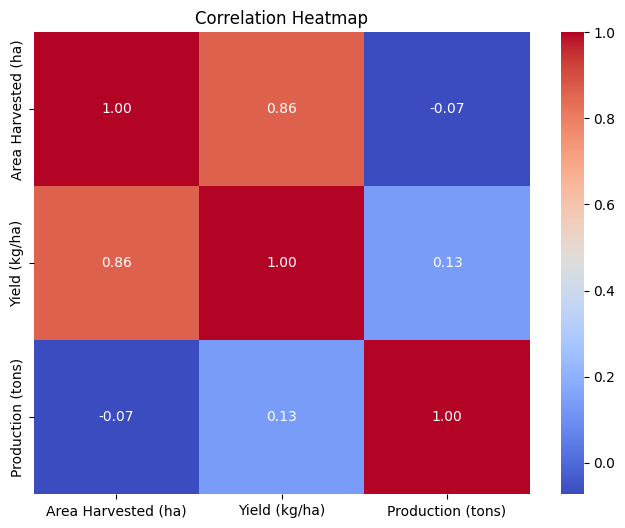

In [9]:
# Calculate correlation matrix
correlation_matrix = df_cleaned[['Area Harvested (ha)', 'Yield (kg/ha)', 'Production (tons)']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Trend Visualization

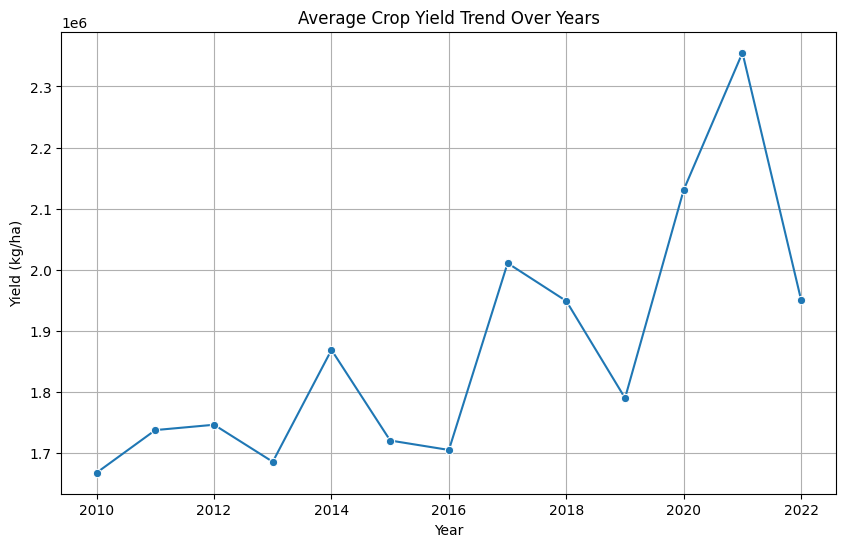

In [10]:
# Aggregate data by year and calculate mean yield
yield_trend = df_cleaned.groupby('Year')['Yield (kg/ha)'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yield_trend, x='Year', y='Yield (kg/ha)', marker='o')
plt.title("Average Crop Yield Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.grid(True)
plt.show()

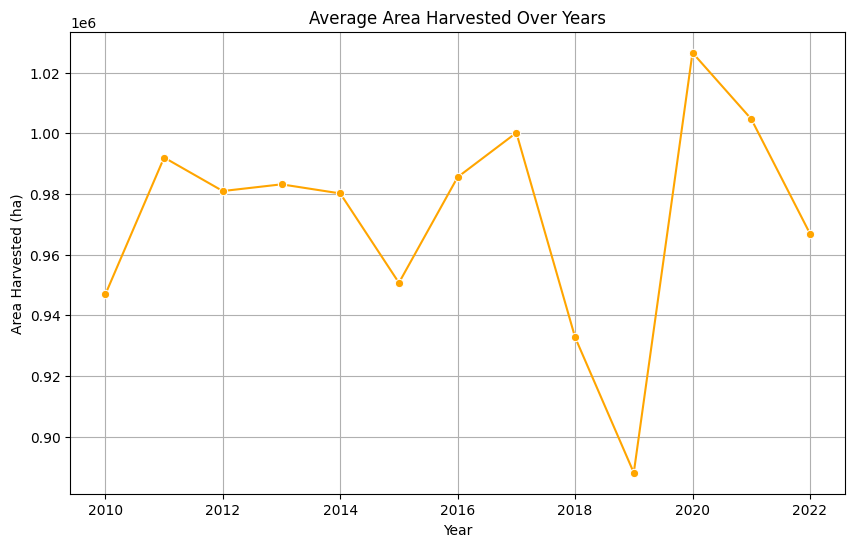

In [11]:
# Aggregate data by year and calculate mean area harvested
area_harvested = df_cleaned.groupby('Year')['Area Harvested (ha)'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=area_harvested, x='Year', y='Area Harvested (ha)', marker='o', color='orange')
plt.title("Average Area Harvested Over Years")
plt.xlabel("Year")
plt.ylabel("Area Harvested (ha)")
plt.grid(True)
plt.show()

Insights by Region

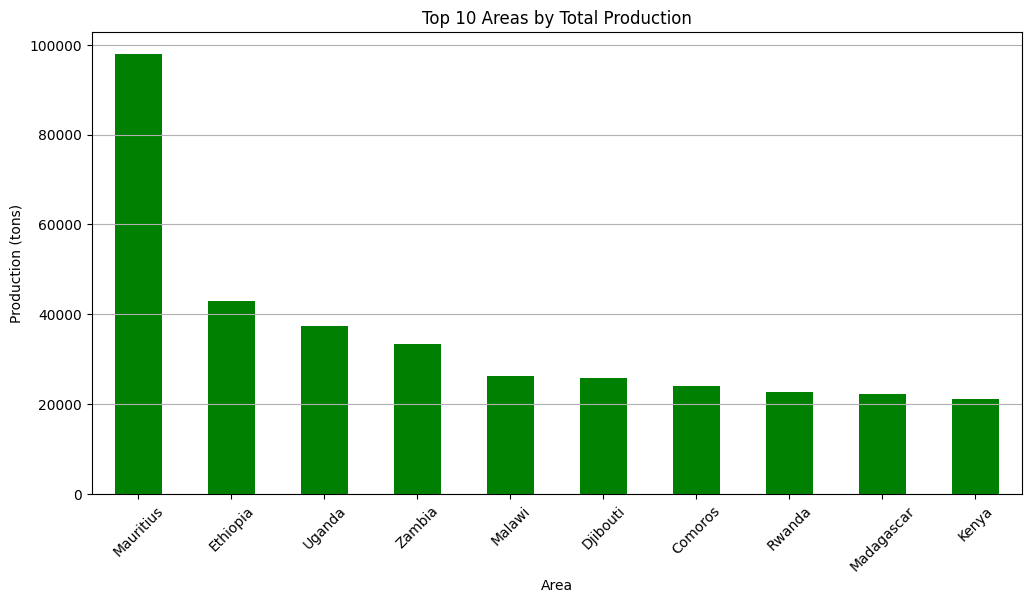

In [12]:
# Aggregate production by area
area_production = df_cleaned.groupby('Area')['Production (tons)'].sum().sort_values(ascending=False).head(10)

# Plot production by area
plt.figure(figsize=(12, 6))
area_production.plot(kind='bar', color='green')
plt.title("Top 10 Areas by Total Production")
plt.xlabel("Area")
plt.ylabel("Production (tons)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Yield Distribution

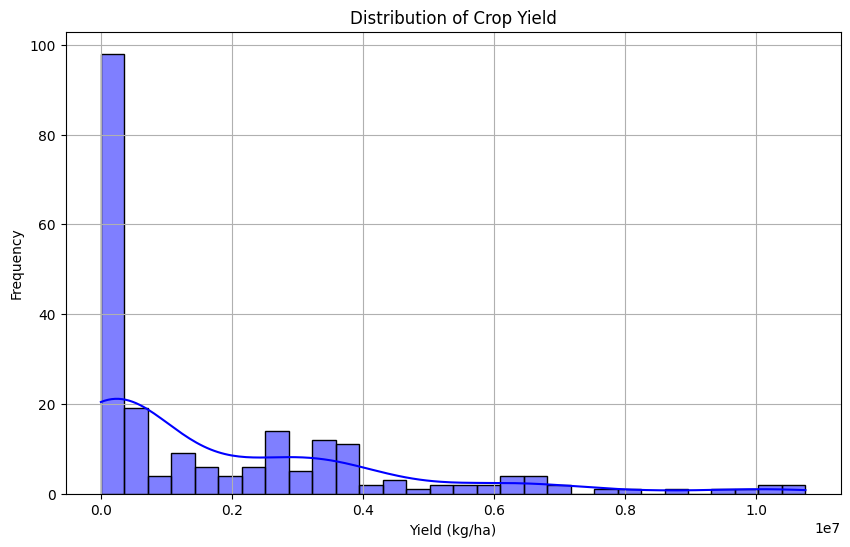

In [13]:
# Plot the distribution of crop yield
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Yield (kg/ha)'], bins=30, kde=True, color='blue')
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield (kg/ha)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Data Inspection and Feature Selection

In [15]:
# Check dataset structure
print("Dataset Columns:")
print(df_cleaned.columns)

# Verify if only maize is present
print("Unique Crops:", df_cleaned['Crop'].unique())

# Use only numerical features for modeling
features = ['Area Harvested (ha)', 'Production (tons)', 'Year']
target = 'Yield (kg/ha)'

# Separate features and target variable
X = df_cleaned[features]
y = df_cleaned[target]

# Display a summary of the features and target
print("Features Preview:")
print(X.head())
print("\nTarget Preview:")
print(y.head())


Dataset Columns:
Index(['Year', 'Area', 'Crop', 'Area Harvested (ha)', 'Yield (kg/ha)',
       'Production (tons)'],
      dtype='object')
Unique Crops: ['Maize (corn)']
Features Preview:
   Area Harvested (ha)  Production (tons)  Year
0             119309.0             1059.5  2010
1               5995.0             1955.7  2010
2                  8.0             1848.3  2010
3              20000.0              900.0  2010
4            2499980.0             2192.6  2010

Target Preview:
0     126412.00
1      11723.80
2         14.06
3      18000.00
4    5481405.90
Name: Yield (kg/ha), dtype: float64


## Model Training

After preprocessing the data, machine learning models are trained to
learn the relationship between input features and crop yield. The data
is split into training and testing sets, and model performance is
evaluated using appropriate metrics.


In [16]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (175, 3)
Testing Features Shape: (44, 3)


Linear Regression

In [17]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression model
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 696986.6954349034
RMSE: 1131921.6124364478
R2 Score: 0.8149372002370603


Random Forest Regressor

In [18]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Performance:
MAE: 155835.3670545455
RMSE: 281595.91943942074
R2 Score: 0.9885464757894709


Feature Importance (Random Forest)

Feature Importance:
               Feature  Importance
0  Area Harvested (ha)    0.845035
1    Production (tons)    0.145236
2                 Year    0.009729


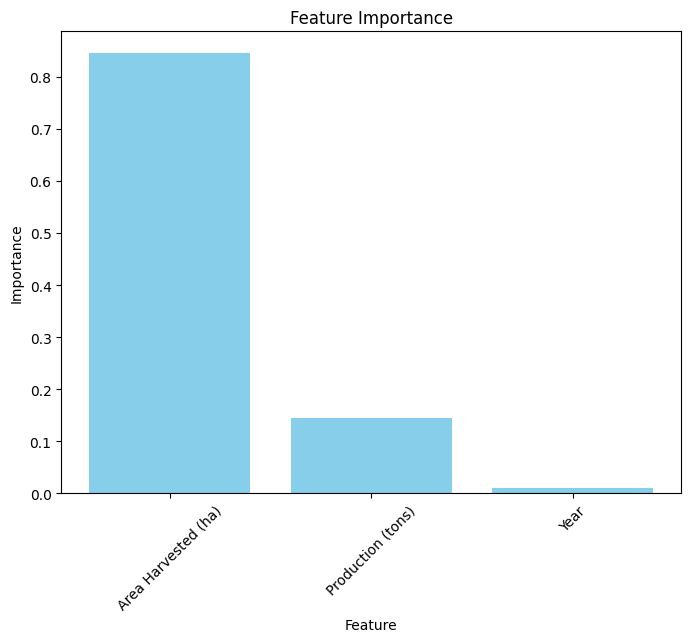

In [19]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance values
print("Feature Importance:")
print(importance_df)

# Visualize the feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


Hyperparemeter Fine Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train a new model with the best parameters
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_rf_model.predict(X_test)
print("\nTuned Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
print("R2 Score:", r2_score(y_test, y_pred_tuned))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Random Forest Performance:
MAE: 150101.20834747938
RMSE: 277036.754927053
R2 Score: 0.9889143488802647


In [21]:
# Predict yields on the test set
y_test_pred = best_rf_model.predict(X_test)

# Combine predictions with actual values for comparison
results_df = pd.DataFrame({'Actual Yield': y_test, 'Predicted Yield': y_test_pred})
results_df['Error'] = results_df['Actual Yield'] - results_df['Predicted Yield']

# Display a sample of the results
print("Sample Predictions:")
print(results_df.head())


Sample Predictions:
     Actual Yield  Predicted Yield          Error
154      20000.00     1.978196e+04     218.042267
93      370140.00     3.586813e+05   11458.707300
216    5900000.00     5.632622e+06  267378.011600
217    2706243.46     2.680027e+06   26216.468100
15     1192399.00     1.355202e+06 -162802.790200


In [22]:
# Check descriptive statistics of errors
print("Error Analysis:")
print(results_df['Error'].describe())


Error Analysis:
count        44.000000
mean      28041.176715
std      278800.356324
min     -939541.207200
25%      -14129.020250
50%         198.732267
75%       68643.838796
max      871788.311500
Name: Error, dtype: float64


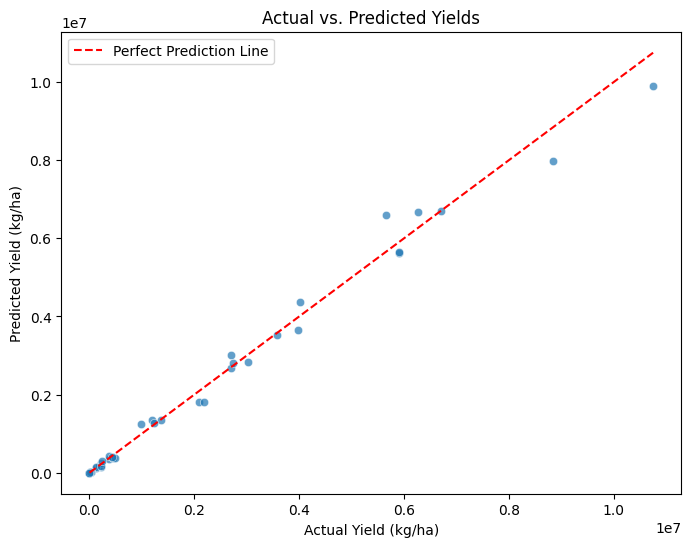

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results_df['Actual Yield'], y=results_df['Predicted Yield'], alpha=0.7)
plt.plot([min(results_df['Actual Yield']), max(results_df['Actual Yield'])],
         [min(results_df['Actual Yield']), max(results_df['Actual Yield'])],
         color='red', linestyle='--', label='Perfect Prediction Line')
plt.title("Actual vs. Predicted Yields")
plt.xlabel("Actual Yield (kg/ha)")
plt.ylabel("Predicted Yield (kg/ha)")
plt.legend()
plt.show()


## Conclusion

The results demonstrate that machine learning can be effectively used
to predict crop yield based on available agricultural data. This project
highlights the potential of data-driven approaches in supporting
decision-making for sustainable agriculture and food security.
